In [41]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

%env KERAS_BACKEND = tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization, Convolution2D , MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

from subprocess import check_output
print(check_output(["ls", "data/"]).decode("utf8"))

from keras.utils.np_utils import to_categorical

env: KERAS_BACKEND=tensorflow
sample_submission.csv
test.csv
train.csv



In [42]:
train = pd.read_csv('data/train.csv')
print(train.shape)
train.head(5)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
test = pd.read_csv('data/test.csv')
print(test.shape)
train.head(5)

(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_train = (train.ix[:,1:].values).astype('float32')
y_train = train.ix[:,0].values.astype('int32')


/home/igor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [80]:
X_test = test.values.astype('float32')

In [45]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

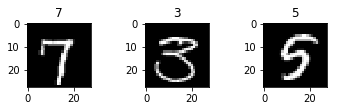

In [47]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6,9):
    plt.subplot(330 + (i + 1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [48]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [84]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

## Preprocessing the digit images


### Feature Standadization

In [49]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def stardardize(x):
    return (x - mean_px)/std_px

In [50]:
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
print(num_classes)

10


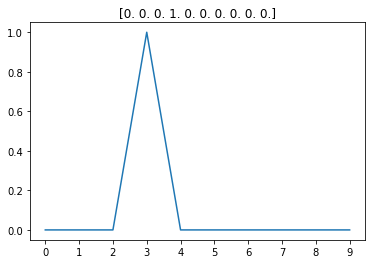

In [51]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));


### Designing Neural Network Architecture 

In [52]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

### Linear Model

In [53]:
model = Sequential()
model.add(Lambda(stardardize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
print('input shape: {}'.format(model.input_shape))
print('output shape: {}'.format(model.output_shape))

input shape: (None, 28, 28, 1)
output shape: (None, 10)


In [54]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
gen = image.ImageDataGenerator()

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [57]:
history = model.fit_generator(batches,batches.n, nb_epoch=1,validation_data=val_batches,nb_val_samples=val_batches.n)

/home/igor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/home/igor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_data=<keras.pre..., epochs=1, validation_steps=4200)`
  """Entry point for launching an IPython kernel.


Epoch 1/1
37800/37800 [==============================] - 122s 3ms/step - loss: 0.2400 - acc: 0.9343 - val_loss: 0.3265 - val_acc: 0.9164


In [58]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

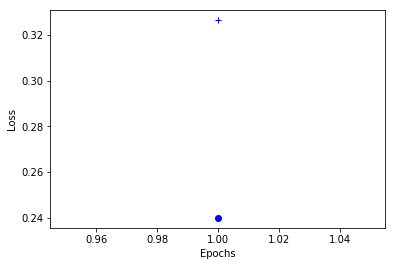

In [74]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)

plt.plot(epochs,loss_values,'bo') # bo is blue dot
plt.plot(epochs,val_loss_values, 'b+') # b+ is blue cross
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

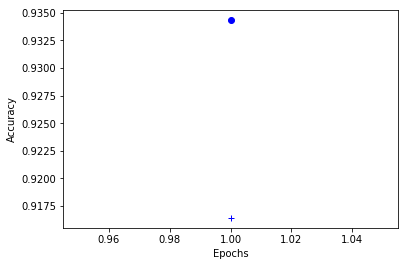

In [75]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc_values,'bo')
plt.plot(epochs,val_acc_values,'b+')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [81]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)
history = model.fit_generator(batches, batches.n, nb_epoch=1)

Epoch 1/1
   50/37800 [..............................] - ETA: 2:03 - loss: 0.1993 - acc: 0.9487

/home/igor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/home/igor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, epochs=1)`
  after removing the cwd from sys.path.


37800/37800 [==============================] - 98s 3ms/step - loss: 0.2100 - acc: 0.9437


In [85]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)

In [86]:
!ls

data  Deep Neural Network.ipynb  DR.csv
